# **AI PYTHON INTERNSHIP TASK** 

### Task:1
- Given an arbitrary function, return a new function, which when called, returns the result
of the original function called with the arguments in reversed order.
For example,
if the original function, f, is a pow function, f(2,3) = 8, 2^3 = 8, then the correct result is a
function g, with g(3,2) = 9, because 3^2 = 9. The function must return a new function g
which, when called, returns the result of f called with the arguments reversed.

In [1]:
# Defining an arbitrary function 'reverse' which returns a new function g

def reverse(f):

    def g(*args):                                                        ### Define function g which returns output with args in reversed
        reversed_args = tuple(reversed(args))                            ### Reversal of arguments of original function f
        output = f(*reversed_args)                                       ### Passing the reversed args in the original function f
        return output                                                    ### Returning result of reversed arguments
    
    return g                                                             ### Returning function g 

Example # 1

- **e.g., f is pow function with arguments (2,3) then the reversed arguments (3,2) iof function g must return the reverse result.**

In [2]:
### Defining an example function, power function, to explain the above reverse function

def pow_func(base, exponent):
    return base ** exponent

f = pow_func                                                            ### Setting power function as original function f
reversed_pow = reverse(f)                                               ### Applying the reverse function on f
           
output = reversed_pow(2,3)                                              ### Passing arguments to the reversed function
print(output)

9


### Task: 2

- An organization maintains employment data in three tables: EMPLOYEE, COMPANY,
and SALARY. Write a query to print the names of every company where the average
salary is greater than or equal to 40000. Each distinct row of results in the output must
contain the name of a company whose average employee salary is > 40,000 in the
COMPANY.NAME format

In [3]:
### Importling library 'sqlite3' for exectution of python code for SQL Queries
### Importing library 'pandas' for displaying tables

import sqlite3
import pandas as pd


############################################  Connection to SQL Database ########################################################################
                                              
connection = sqlite3.connect('database.db')                    ### Connect to the SQLite database (creates a new database if it doesn't exist)              

cursor = connection.cursor()                                   ### Create a cursor object to execute SQL queries




##############################################   Creating tables for executing queries ###################################################

### Create the COMPANY table
cursor.execute('''          
    CREATE TABLE COMPANY (
        ID INTEGER PRIMARY KEY,
        NAME TEXT
    )
''')

### Create the EMPLOYEE table
cursor.execute('''
    CREATE TABLE EMPLOYEE (
        ID INTEGER PRIMARY KEY,
        NAME TEXT,
        COMPANY_ID INTEGER,
        FOREIGN KEY (COMPANY_ID) REFERENCES COMPANY (ID)
    )
''')

### Create the SALARY table
cursor.execute('''
    CREATE TABLE SALARY (
        ID INTEGER PRIMARY KEY,
        EMPLOYEE_ID INTEGER,
        AMOUNT INTEGER,
        FOREIGN KEY (EMPLOYEE_ID) REFERENCES EMPLOYEE (ID)
    )
''')

########################################################### Creating Samples of data for the tables #########################################

### Samples of data for the tables
companies = [
    (1, 'Company A'),
    (2, 'Company B'),
    (3, 'Company C')
]

employees = [
    (1, 'John', 1),
    (2, 'Sarah', 1),
    (3, 'Michael', 2),
    (4, 'Emily', 2),
    (5, 'David', 3),
    (6, 'Jessica', 3)
]

salaries = [
    (1, 1, 45000),
    (2, 2, 42000),
    (3, 3, 38000),
    (4, 4, 39000),
    (5, 5, 41000),
    (6, 6, 43000)
]

######################################################## Inserting samples of data into tables #########################################

# Insert data into the tables using loops
for company in companies:
    cursor.execute("INSERT INTO COMPANY (ID, NAME) VALUES (?, ?)", company)

for employee in employees:
    cursor.execute("INSERT INTO EMPLOYEE (ID, NAME, COMPANY_ID) VALUES (?, ?, ?)", employee)

for salary in salaries:
    cursor.execute("INSERT INTO SALARY (ID, EMPLOYEE_ID, AMOUNT) VALUES (?, ?, ?)", salary)


################################################### Commiting changes and executing queries ###########################################

# Commit the changes to the database
connection.commit()

# SQL query to retrieve company names with average salary >= 40000
query = '''
SELECT COMPANY.NAME
FROM COMPANY
JOIN EMPLOYEE ON COMPANY.ID = EMPLOYEE.COMPANY_ID
JOIN SALARY ON EMPLOYEE.ID = SALARY.EMPLOYEE_ID
GROUP BY COMPANY.NAME
HAVING AVG(SALARY.AMOUNT) >= 40000
'''

# Execute the SQL query
cursor.execute(query)

######################################################### Printing Tables ############################################################

# Convert tables into DataFrames
company_df = pd.read_sql_query("SELECT * FROM COMPANY", connection)
employee_df = pd.read_sql_query("SELECT * FROM EMPLOYEE", connection)
salary_df = pd.read_sql_query("SELECT * FROM SALARY", connection)

# Print the tables
print("\nCOMPANY TABLE:")
print(company_df)

print("\nEMPLOYEE TABLE:")
print(employee_df)

print("\nSALARY TABLE:")
print(salary_df)

###################################################### Printing result of the query ###################################################

# Fetch all the rows as a list of tuples
rows = cursor.fetchall()

# Print the company names
print('\n Companies where average salary >= 40000: ')
for row in rows:
    print(row[0])


#################################################### Shutting the database off ##################################################

# Close the cursor and database connection
cursor.close()
connection.close()



COMPANY TABLE:
   ID       NAME
0   1  Company A
1   2  Company B
2   3  Company C

EMPLOYEE TABLE:
   ID     NAME  COMPANY_ID
0   1     John           1
1   2    Sarah           1
2   3  Michael           2
3   4    Emily           2
4   5    David           3
5   6  Jessica           3

SALARY TABLE:
   ID  EMPLOYEE_ID  AMOUNT
0   1            1   45000
1   2            2   42000
2   3            3   38000
3   4            4   39000
4   5            5   41000
5   6            6   43000

 Companies where average salary >= 40000: 
Company A
Company C


### Task: 3
- Develop a python script using Numpy and Pandas libraries to analyze a given dataset
and extract insights from it. The insights should be presented in a clear and concise
format using appropriate visualizations.
- Dataset: https://www.kaggle.com/c/instacart-market-basket-analysis/data
- Hint: You can predict sales trends, best selling products, and dynamic price prediction
for increasing sales

### **Importing the Libraries**

In [4]:
import numpy as np
import pandas as pd
import zipfile
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from IPython.display import display
import random

### **2. Defining the required Functions**

In [5]:
# Converting the days and hours from numbers to their interpretable form
days_of_week = {0: 'Saturday', 
                1: 'Sunday', 
                2: 'Monday',
                3: 'Tuesday',
                4: 'Wednesday',
                5: 'Thursday',
                6: 'Friday'}
hour_nums = list(range(24))
hours_of_day = {hour_num:datetime.time(hour_num).strftime("%I:00 %p") for hour_num in hour_nums}

# define Seaborn color palette to use
# colors = sns.color_palette("hls", 8)
colors = sns.color_palette("crest", 8)
cmap_colors = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

# define the fig size of all figures
plt.rcParams["figure.figsize"] = (10,6)

# Annotate text on graph
def annotate_text(p, append_to_text='%'):
    for p in ax.patches:
        txt = str(p.get_height().round(2)) + append_to_text
        txt_x = p.get_x() + p.get_width()/2.
        txt_y = 0.92*p.get_height()
        ax.text(txt_x,txt_y,txt, fontsize=20, color='#004235', ha='center', va='bottom')

### **3. Loading the Data**

In [8]:
# Reading the csv files into corresponding dataframes

aisles = pd.read_csv('aisles.csv')

departments = pd.read_csv('departments.csv')

order_products_prior = pd.read_csv('order_products__prior.csv')

order_products_train = pd.read_csv('order_products__train.csv')

orders = pd.read_csv('orders.csv')

# Replacing numbers with their corresponding hour representation
orders['order_hour_of_day'] = orders['order_hour_of_day'].replace(to_replace=hours_of_day)
orders['order_hour_of_day'] = pd.Categorical(orders['order_hour_of_day'], 
                                             ordered=True, 
                                             categories=list(hours_of_day.values()))
# Replacing numbers with their corresponding day of week
# Define the categories of days of week sorted normally from Saturday to Friday
orders['order_dow'] = orders['order_dow'].replace(to_replace=days_of_week)
orders['order_dow'] = pd.Categorical(orders['order_dow'], 
                                     ordered=True, 
                                     categories=list(days_of_week.values()))

products = pd.read_csv('products.csv')

### **4. Data Inspection**

In [9]:
print('Shape of order_products_train table: ', order_products_train.shape)
order_products_train.head()

Shape of order_products_train table:  (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
print('Shape of order_products_prior table: ', order_products_prior.shape)
order_products_prior.head()

Shape of order_products_prior table:  (32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
print('Shape of products table: ', products.shape)
print('Uniques products', products['product_name'].nunique())
products.head()

Shape of products table:  (49688, 4)
Uniques products 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
organic = products['product_name'].str.contains('Organic')
products['is_organic'] = organic
products.iloc[20:30].head()

,product_id,product_name,aisle_id,department_id,is_organic
20,21,Small & Medium Dental Dog Treats,40,8,False
21,22,Fresh Breath Oral Rinse Mild Mint,20,11,False
22,23,Organic Turkey Burgers,49,12,True
23,24,Tri-Vi-Sol® Vitamins A-C-and D Supplement Drop...,47,11,False
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19,False


In [13]:
print('Shape of departments table: ', departments.shape)
departments.head(departments.shape[0])

Shape of departments table:  (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
print('Shape of aisles table: ', aisles.shape)
aisles.head()

Shape of aisles table:  (134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [15]:
print('Shape of Orders table: ', orders.shape)
orders.head(12)

Shape of Orders table:  (3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,Monday,08:00 AM,NaN
1,2398795,1,prior,2,Tuesday,07:00 AM,15.0
2,473747,1,prior,3,Tuesday,12:00 PM,21.0
3,2254736,1,prior,4,Wednesday,07:00 AM,29.0
4,431534,1,prior,5,Wednesday,03:00 PM,28.0
5,3367565,1,prior,6,Monday,07:00 AM,19.0
6,550135,1,prior,7,Sunday,09:00 AM,20.0
7,3108588,1,prior,8,Sunday,02:00 PM,14.0
8,2295261,1,prior,9,Sunday,04:00 PM,0.0
9,2550362,1,prior,10,Wednesday,08:00 AM,30.0


### **5.Merging products, order_products, and orders tables**

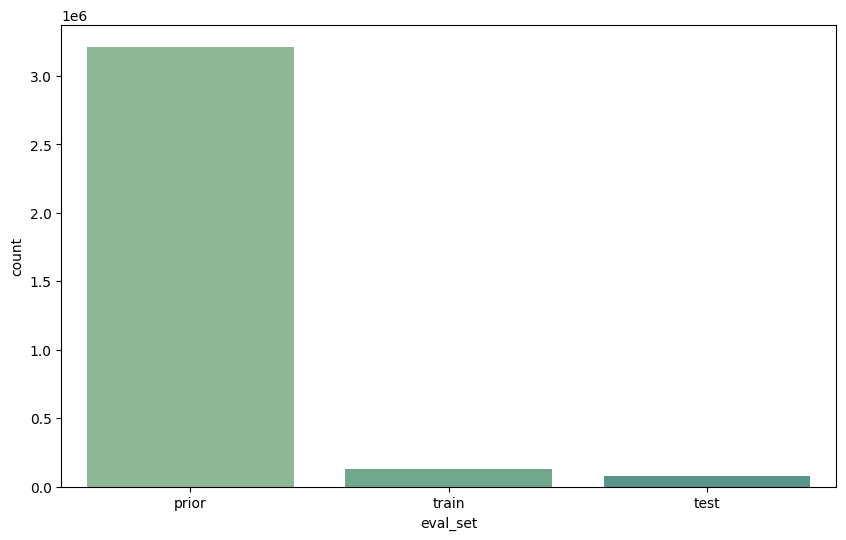

In [16]:
# Count of prior, train, test orders given in the data
sns.countplot(x='eval_set', data=orders, palette=colors)
plt.show()

In [17]:
# Merging the Prior and train order_products
order_products = pd.concat([order_products_train, order_products_prior])
order_products = order_products.merge(products, on='product_id', how='left').merge(orders, on='order_id', how='left').merge(departments, on='department_id').merge(aisles, on='aisle_id')

# Count of total orders
total_orders = order_products['order_id'].nunique()
print('Count of total orders: ', total_orders)

print('Merging products, order_products, and orders tables...')

order_products.head()

Count of total orders:  3346083
Merging products, order_products, and orders tables...


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_organic,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,False,112108,train,4,Wednesday,10:00 AM,9.0,dairy eggs,yogurt
1,98,43654,3,1,Whole Milk Greek Blended Vanilla Bean Yogurt,120,16,False,56463,train,41,Tuesday,08:00 AM,14.0,dairy eggs,yogurt
2,170,8153,6,0,Plain Non-Fat Greek Yogurt,120,16,False,182389,train,7,Saturday,01:00 PM,14.0,dairy eggs,yogurt
3,631,9203,13,1,Dairy Free Coconut Milk Raspberry Yogurt Alter...,120,16,False,184099,train,7,Tuesday,09:00 AM,30.0,dairy eggs,yogurt
4,631,15842,14,1,Dairy Free Coconut Milk Yogurt Alternative,120,16,False,184099,train,7,Tuesday,09:00 AM,30.0,dairy eggs,yogurt


### **Insights on products, order_products, and orders tables**
### Ratio of reordered products 
- 58.9697% of products in prior orders were re-ordered.
- 59.8594% of products in train orders were re-ordered.
- 11.868056% of orders having no reordered product.
- 21.493998% of orders having all product re-ordered.

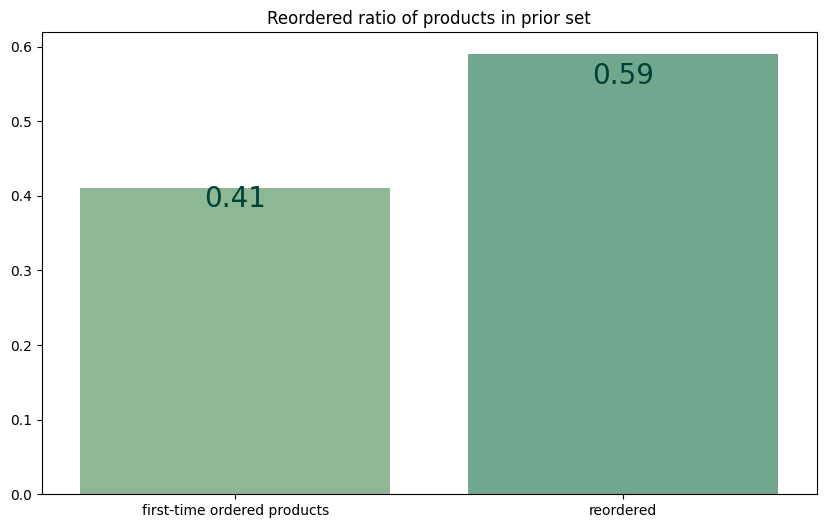

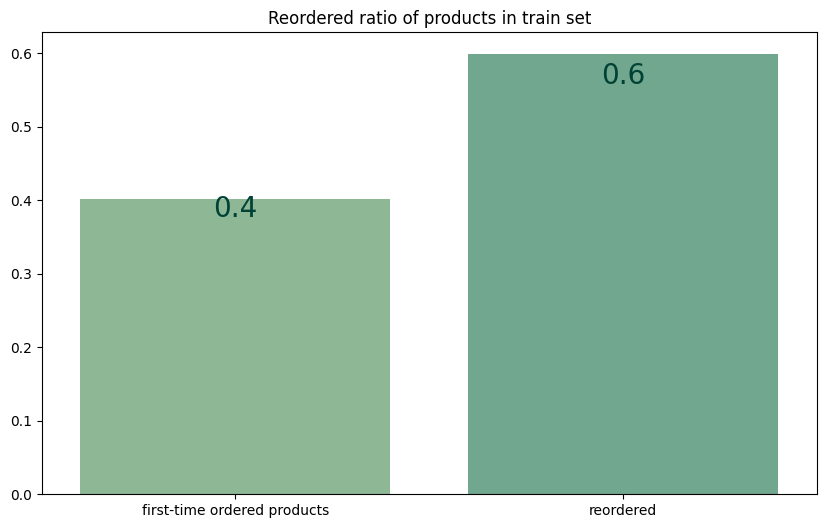

In [18]:
total_prod_count = order_products_prior.shape[0]
reorder_ratio = order_products_prior['reordered'].value_counts()/total_prod_count
ax = sns.barplot(x=reorder_ratio.index, y=reorder_ratio.values, palette=colors)
ax.set_xticklabels(['first-time ordered products', 'reordered'])
annotate_text(ax, append_to_text='')
plt.title('Reordered ratio of products in prior set')
plt.show()

total_prod_count = order_products_train.shape[0]
reorder_ratio = order_products_train['reordered'].value_counts()/total_prod_count
ax = sns.barplot(x=reorder_ratio.index, y=reorder_ratio.values, palette=colors)
ax.set_xticklabels(['first-time ordered products', 'reordered'])
annotate_text(ax, append_to_text='')
plt.title('Reordered ratio of products in train set')
plt.show()

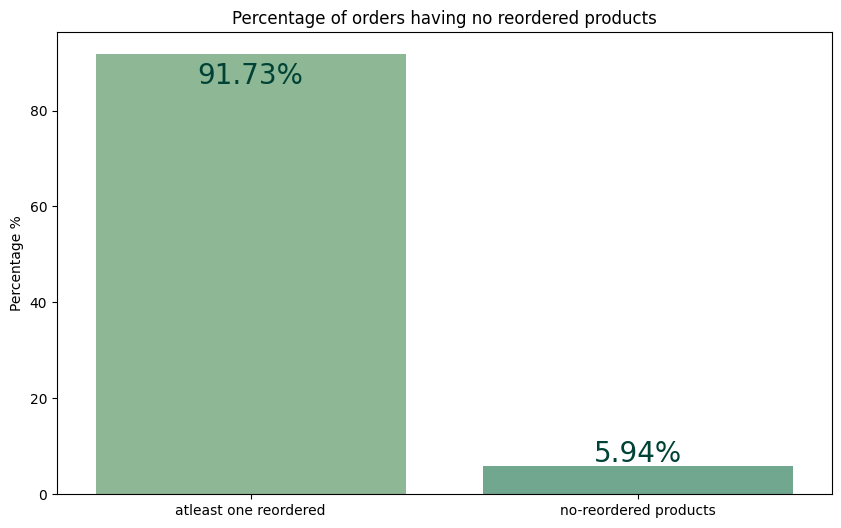

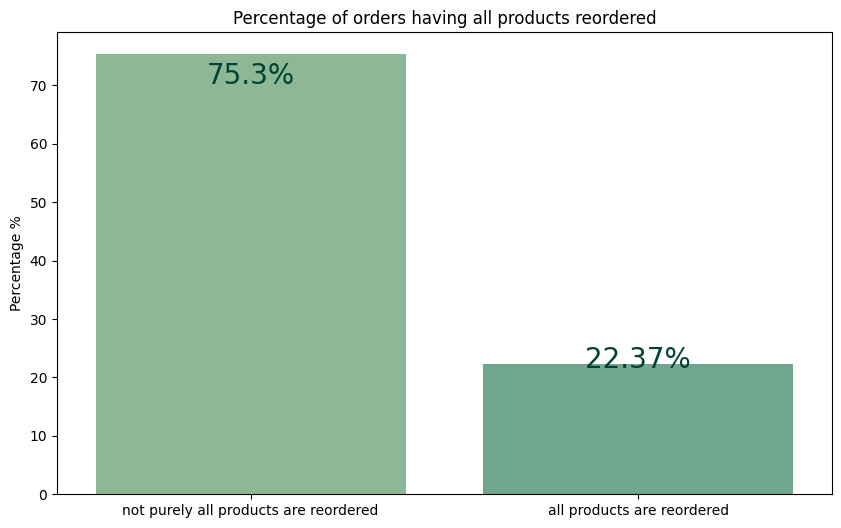

,order_id,reordered_ratio,order_number,no_reordered,all_reordered
0,1,0.500000,4,False,False
1,2,0.666667,3,False,False
2,3,1.000000,16,False,True
3,4,0.923077,36,False,False
4,5,0.807692,42,False,False


In [19]:
groupeddf = order_products.groupby(['order_id']).agg({'reordered':'mean', 'order_number':'first'}).reset_index().rename(columns={'reordered':'reordered_ratio'})
groupeddf['no_reordered'] = groupeddf['reordered_ratio'] == 0
groupeddf['all_reordered'] = groupeddf['reordered_ratio'] == 1.0

# Count of non-first orders
non_first_orders_Mask = orders.order_number != 1
non_first_orders_count = np.sum(non_first_orders_Mask)

# Ratio of non-first orders containing no previously ordered products vs containing at least one previously ordered products
groupeddf = groupeddf[groupeddf.order_number != 1]
groupeddf['no_reordered'] = groupeddf['reordered_ratio'] == 0
no_reordered_count = groupeddf['no_reordered'].value_counts()/non_first_orders_count * 100
ax = sns.barplot(x=no_reordered_count.index, y=no_reordered_count.values, palette=colors)
annotate_text(ax)
ax.set_xticklabels(['atleast one reordered', 'no-reordered products'])
plt.title('Percentage of orders having no reordered products')
plt.ylabel('Percentage %')
plt.show()

# Ratio of non-first orders where their products were all previously purchased
groupeddf['all_reordered'] = groupeddf['reordered_ratio'] == 1.0
all_reordered_count = groupeddf['all_reordered'].value_counts()/non_first_orders_count * 100
ax = sns.barplot(x=all_reordered_count.index, y=all_reordered_count.values, palette=colors)
annotate_text(ax)
ax.set_xticklabels(['not purely all products are reordered', 'all products are reordered'])
plt.title('Percentage of orders having all products reordered')
plt.ylabel('Percentage %')
plt.show()

groupeddf.head()

### **Insights on products, order_products, and orders tables**
- Most baskets contain from 5-8 products.
- Products placed first in cart are the products mostly reordered.

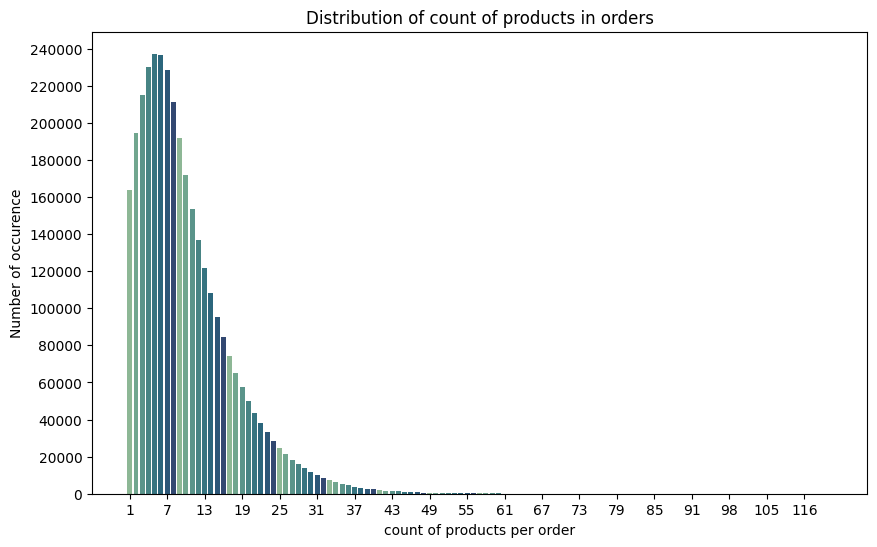

In [20]:
# Ploting a histogram for the # of products in an order
count_of_products = order_products.groupby(['order_id'], as_index=False)['product_id'].count()
count_of_products['count_of_products'] = count_of_products['product_id']
sns.countplot(x='count_of_products', data=count_of_products, palette=colors)
plt.xlabel('count of products per order')
plt.ylabel('Number of occurence')
plt.title('Distribution of count of products in orders')
plt.locator_params(nbins=20)
plt.show()

del count_of_products

C:\Users\HP\AppData\Local\Temp\ipykernel_5132\2035267217.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=groupeddf['add_to_cart_order'], y=groupeddf['reordered_ratio'], palette=colors)


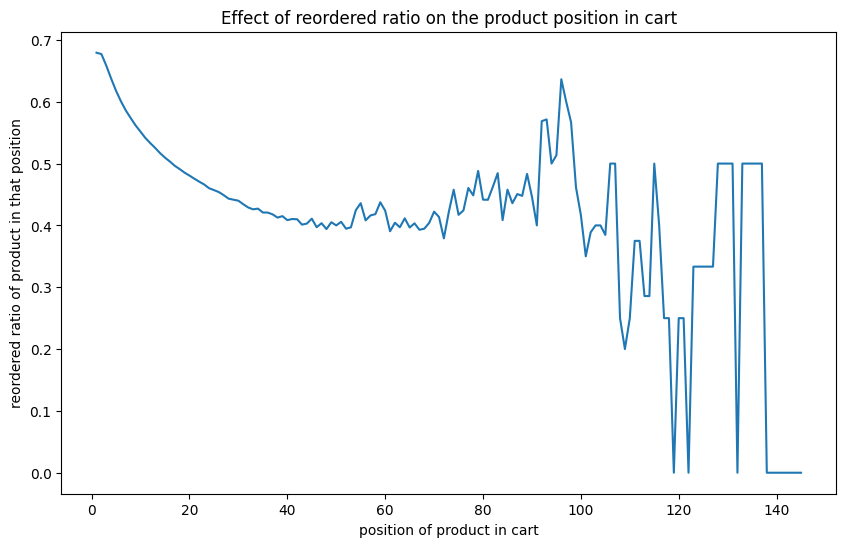

In [21]:
# Relation between the order number and the reorder ratio of that order

# Relation between the add to cart postiion and the reorder ratio of that product
groupeddf = order_products.groupby(['add_to_cart_order']).agg({'reordered':'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
sns.lineplot(x=groupeddf['add_to_cart_order'], y=groupeddf['reordered_ratio'], palette=colors)
plt.title('Effect of reordered ratio on the product position in cart')
plt.xlabel('position of product in cart')
plt.ylabel('reordered ratio of product in that position')
plt.show()


### **Insights**
### Analyzing the count of reordered products in a basket
- Most baskets have from 0-5 reordered product
- Probability of a basket having 0 reordered products: 11.868056
- Probability of a basket having 1 reordered products: 10.262626
- Probability of a basket having 2 reordered products: 10.326791
- Probability of a basket having 3 reordered products: 9.735981
- Probability of a basket having 4 reordered products: 8.777965

In [22]:
# Getting list of user ids, who always reorder products from their first order.
non_first_orders_mask = order_products['order_number'] != 1
groupeddf = order_products[non_first_orders_mask].groupby(['user_id']).agg({'reordered':'mean', 'order_number':'count'}).rename(columns={'reordered':'reordered_ratio'})
mask = groupeddf['reordered_ratio'] == 1
always_reorder_users_id = groupeddf[mask].index.to_list()
print('Count of users who always order the same products every time:', len(always_reorder_users_id))

# getting the orders of the a random user
rand_indx = random.randint(0,len(always_reorder_users_id))
rand_user_id = always_reorder_users_id[rand_indx]
user_mask = orders['user_id'] == rand_user_id
user_orders = orders[user_mask]['order_id'].to_list()
print(f'Orders of user {rand_user_id}:')
print(f'Count of his orders: {len(user_orders)}')
for order_id in user_orders:
    print(f'Order number{order_id}:')
    print(order_products[order_products['order_id'] == order_id]['product_name'].to_list())
    print('--------------')
del groupeddf, mask, always_reorder_users_id

Count of users who always order the same products every time: 685
Orders of user 198641:
Count of his orders: 9
Order number2031296:
['Glass Cleaner Spray']
--------------
Order number2292283:
['Glass Cleaner Spray']
--------------
Order number647332:
['Glass Cleaner Spray']
--------------
Order number1193509:
['Glass Cleaner Spray']
--------------
Order number3092726:
['Glass Cleaner Spray']
--------------
Order number903589:
['Glass Cleaner Spray']
--------------
Order number2851988:
['Glass Cleaner Spray']
--------------
Order number1031567:
['Glass Cleaner Spray']
--------------
Order number2584280:
[]
--------------


### **Insights**
### How Time affects the purchasing behaviour of customers?
- Most orders are ordered on Day 0 and Day 1.
- Orders are mostly ordered during day, from 9:00 AM to 4:00 PM.
- Peak orders happens at Saturday afternoon (1:00PM), and Sunday morning (10:00AM)
- By more than 65%, People usually buy previously ordered products from 6:00AM to 8:00AM
- Most users make orders after a week from their last order. or from a month of their last order.
- After a week from the last order, the probability of reordering within the same month is small.
    - Send reminders of the most likely ordered products within a week, to catch the high prob of a customer to make their next order.
- The Next order has higher probability to be during 10 days from the current order.

C:\Users\HP\AppData\Local\Temp\ipykernel_5132\2704968580.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=orders, x='order_dow', palette=colors, bins=7)


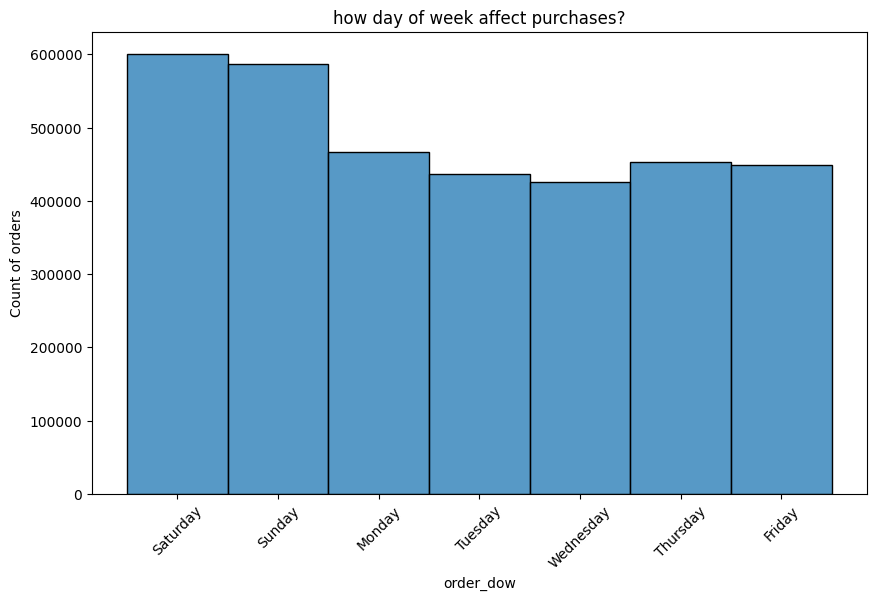

C:\Users\HP\AppData\Local\Temp\ipykernel_5132\2704968580.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=orders, x='order_hour_of_day', palette=colors, bins=24)


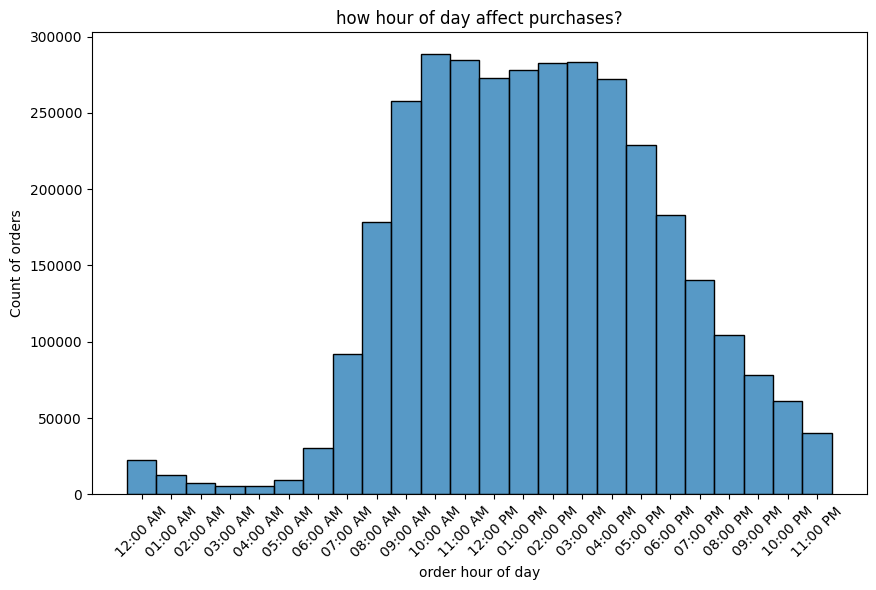

C:\Users\HP\AppData\Local\Temp\ipykernel_5132\2704968580.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=orders, x='days_since_prior_order', palette=colors, bins=30)


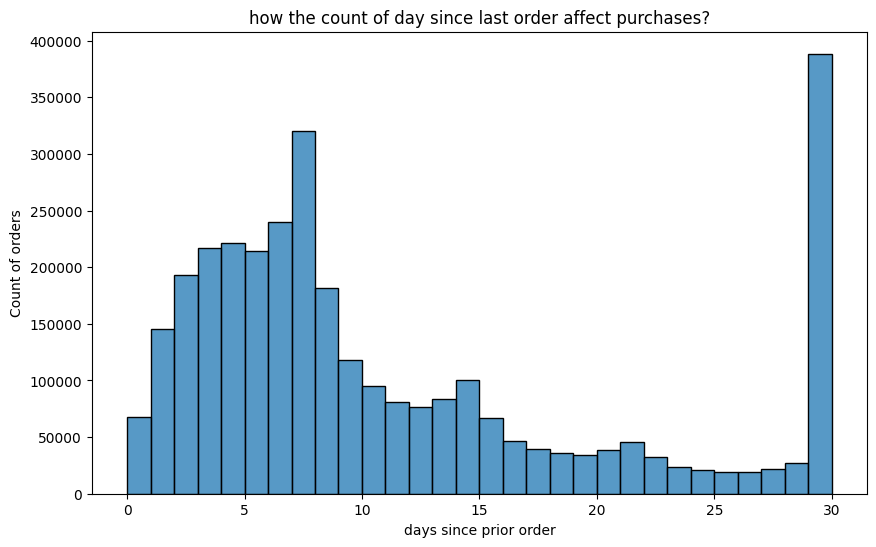

In [23]:
# Histogram for order day of week
sns.histplot(data=orders, x='order_dow', palette=colors, bins=7)
plt.xlabel('order_dow')
plt.ylabel('Count of orders')
plt.title('how day of week affect purchases?')
plt.xticks(rotation= 45)
plt.show()

# Histogram for order hour of day
sns.histplot(data=orders, x='order_hour_of_day', palette=colors, bins=24)
plt.xlabel('order hour of day')
plt.xticks(rotation= 45)
plt.ylabel('Count of orders')
plt.title('how hour of day affect purchases?')
plt.show()

# Histogram for days passed before last order
sns.histplot(data=orders, x='days_since_prior_order', palette=colors, bins=30)
plt.xlabel('days since prior order')
plt.ylabel('Count of orders')
plt.title('how the count of day since last order affect purchases?')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5132\1888437617.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'orders_count')


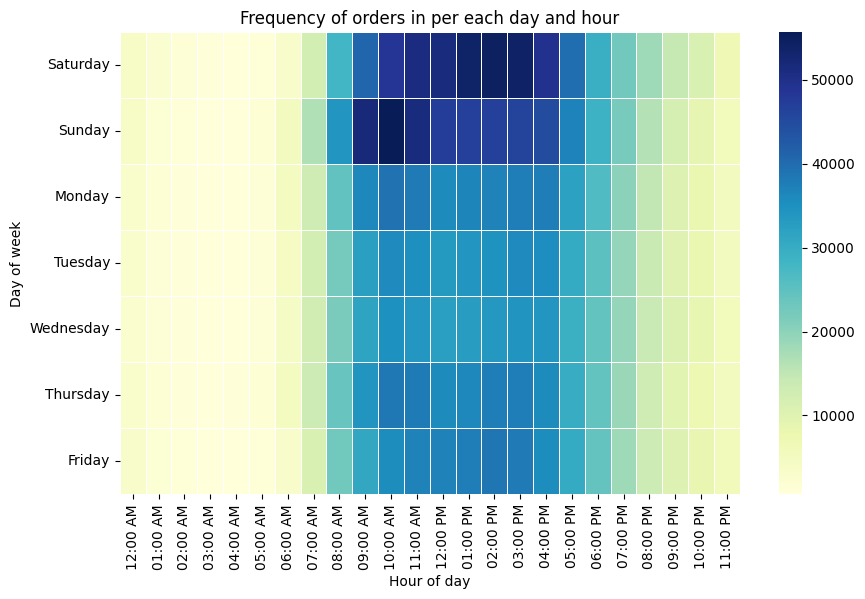

In [24]:
# Heatmap of the count of orders in each day with each hour
groupeddf = orders.groupby(['order_dow', 'order_hour_of_day'])['order_id'].agg('count').reset_index().rename(columns={'order_id':'orders_count'})
heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'orders_count')

ax = sns.heatmap(data=heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title('Frequency of orders in per each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

### **Insights**
### Association between days since last order and the ratio of reorders
- 74 % of products bought at the same day of prev order, are reorders
- 69% of products bought after 1 week of prev order, are reorders
- Conculsion:
    - if future order will be at the same day of prev order, percentage of reorders in the future product is high.
    - if future order will be after a week from the prev order, percentage of reorders in the future product is high.

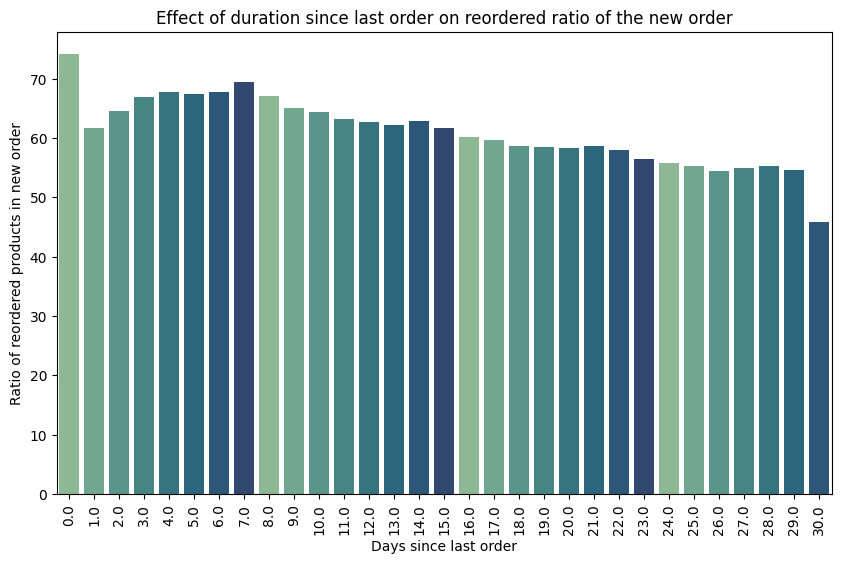

In [26]:
groupeddf = order_products.groupby(['days_since_prior_order']).agg({'reordered': 'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
sns.barplot(x=groupeddf['days_since_prior_order'], y=groupeddf['reordered_ratio']*100, palette=colors)
plt.ylabel('Ratio of reordered products in new order')
plt.xlabel('Days since last order')
plt.xticks(rotation=90)
plt.title('Effect of duration since last order on reordered ratio of the new order')
plt.show()

### **Insights on Products**
### Analyzing Products
### How often a product is purchased?
- 5 Most Ordered Products
    - Banana
    - Bag of Organic Bananas
    - Organic Strawberries
    - Organic Baby Spinach
    - Organic Hass Avocado
- 14% of all orders contains bananas.
- Organic products are frequently ordered.

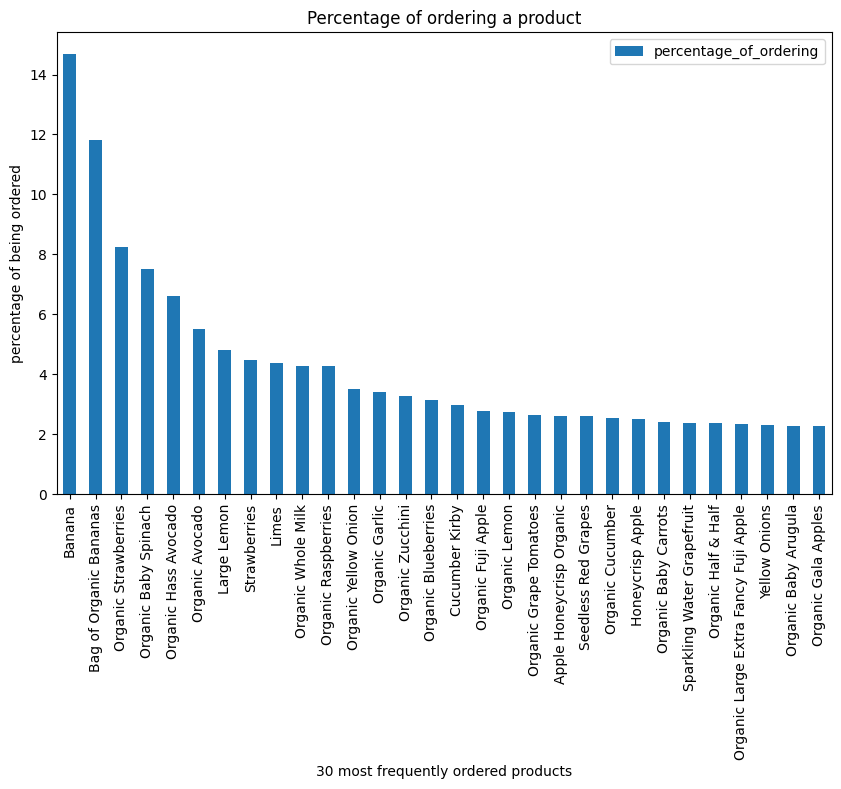

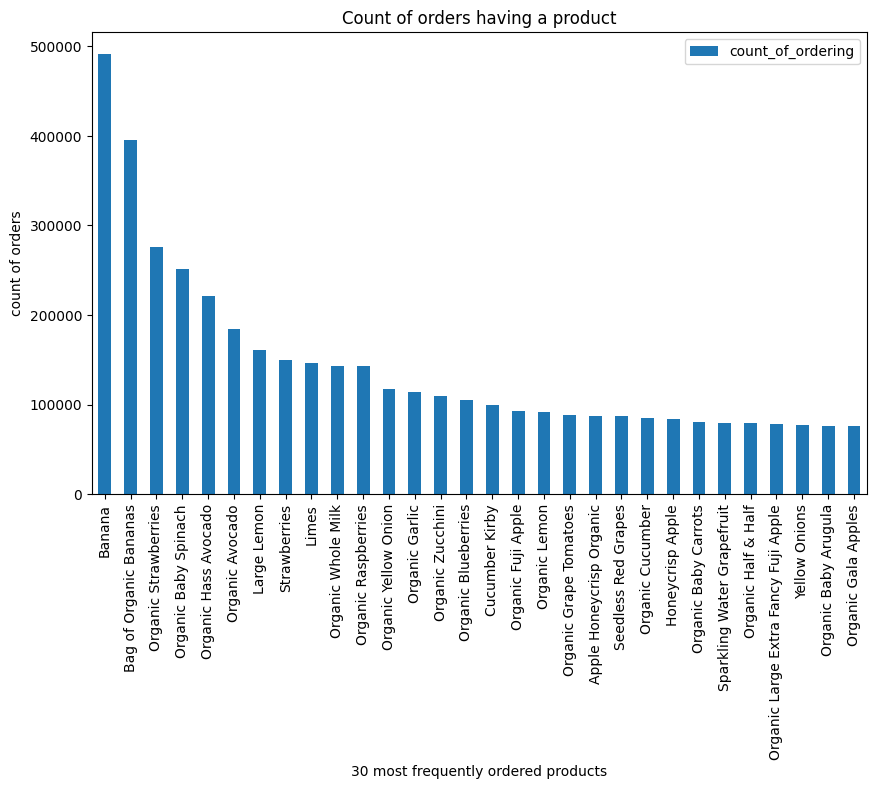

In [27]:
# Sorting products descendingly by their frequency of being ordered
products_frequency_desc = order_products.groupby('product_name')['order_id'].aggregate('count').reset_index()
products_frequency_desc['count_of_ordering'] =  products_frequency_desc['order_id']
products_frequency_desc = products_frequency_desc.sort_values(by=['count_of_ordering'], ascending=False)

# Ploting the Percentage of being ordered for the 30 most frequently ordered products.
products_frequency_desc['percentage_of_ordering'] = (products_frequency_desc['count_of_ordering']/total_orders) * 100 
products_frequency_desc.iloc[:30].plot.bar(x='product_name', y='percentage_of_ordering')
plt.xlabel('30 most frequently ordered products')
plt.ylabel('percentage of being ordered')
plt.xticks(rotation=90)
plt.title('Percentage of ordering a product')
plt.show()

products_frequency_desc.iloc[:30].plot.bar(x='product_name', y='count_of_ordering')
plt.xlabel('30 most frequently ordered products')
plt.ylabel('count of orders')
plt.xticks(rotation=90)
plt.title('Count of orders having a product')
plt.show()

del products_frequency_desc

### **Insights**
### How often a product is the first item purchased?
- 5 Most Add to Cart First Products
    - Banana
    - Bag of Organic Bananas
    - Organic Whole Milk
    - Organic Strawberries
    - Organic Hass Avocado
- 3.4% of the orders, Banana is being the first product added to cart.
- Products contianing milk have very high probability to be reordered.
- Organic products have very high probability to be reordered.

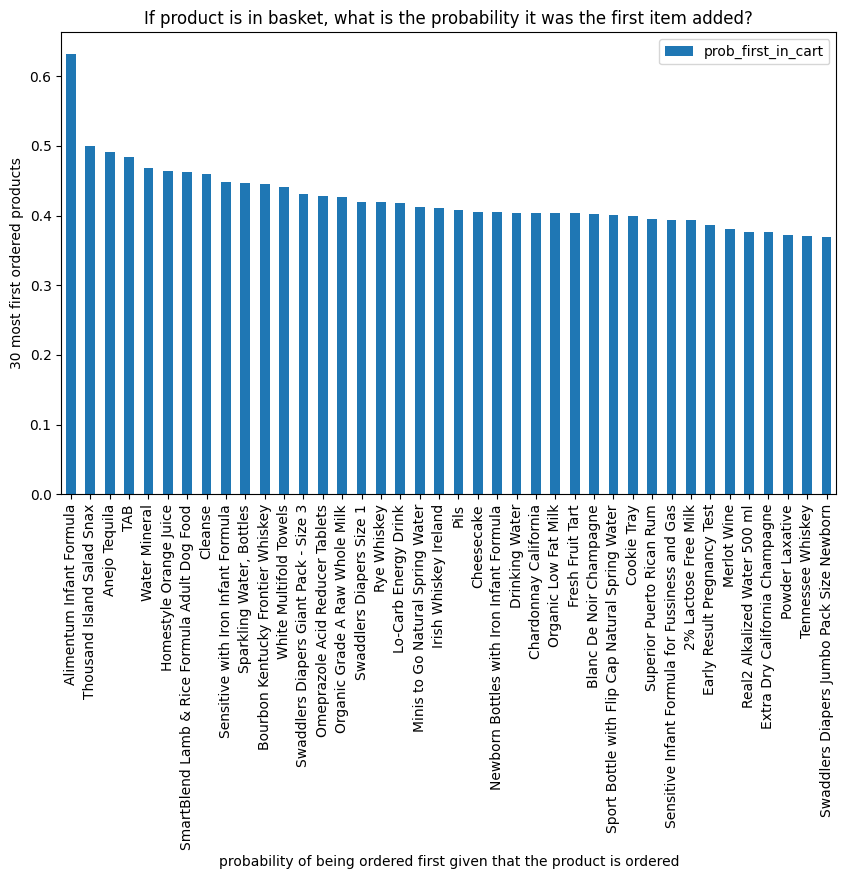

In [29]:
# Sorting Products by the count of times they appeared first in cart.
order_products['is_first_in_cart'] = order_products['add_to_cart_order'] == 1
groupeddf = order_products.groupby(['product_name'], as_index = False).agg({'is_first_in_cart': 'mean', 'order_id': 'count'}).rename(columns={'is_first_in_cart':'prob_first_in_cart', 'order_id':'orders_count'})
confident_products_mask = groupeddf['orders_count'] > 100
groupeddf = groupeddf[confident_products_mask].sort_values(by='prob_first_in_cart', ascending=False)

# Ploting the Percentage of being ordered first for the 30 most first ordered products.
groupeddf.iloc[:40].plot.bar(x='product_name', y='prob_first_in_cart')
plt.ylabel('30 most first ordered products')
plt.xlabel('probability of being ordered first given that the product is ordered')
plt.title('If product is in basket, what is the probability it was the first item added?')
plt.xticks(rotation=90)
plt.show()

del confident_products_mask

### Probability of reordering a product

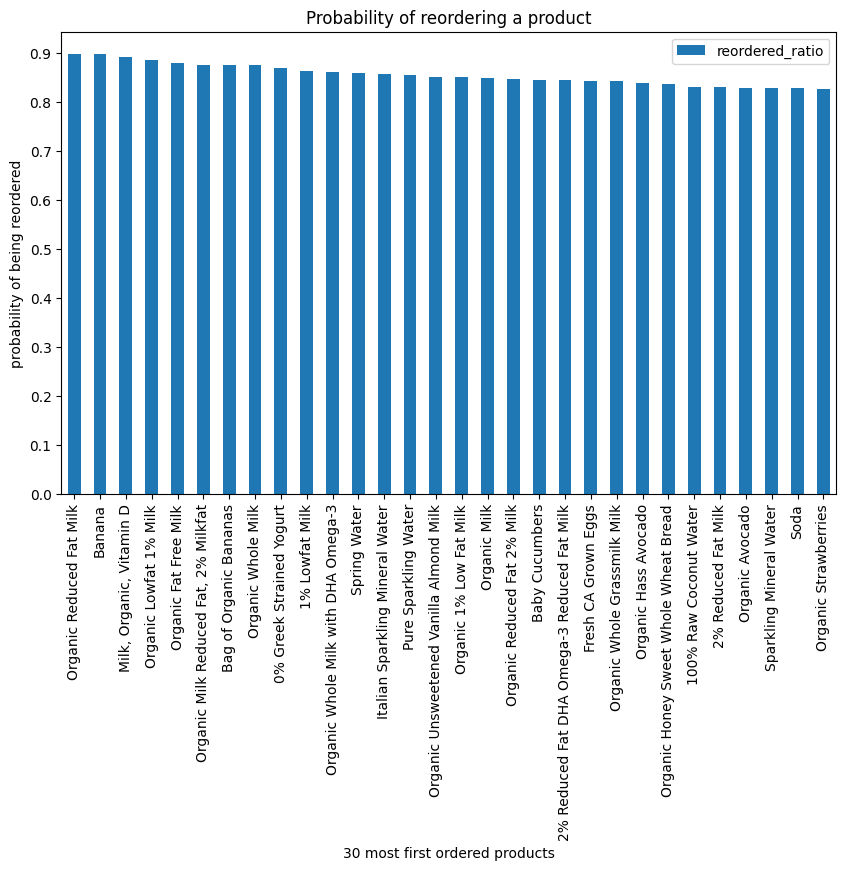

Count of total Organic Reduced Fat Milk purchases: (36869, 17)
Count of reordered Organic Reduced Fat Milk purchases: (31394, 17)


In [30]:
# For each product what is its probability to be reordered.
# We don't consider the first order of the user because 100% it won't contain any prev. ordered products.
non_first_orders_Mask = order_products['order_number'] != 1
groupeddf = order_products[non_first_orders_Mask].groupby('product_name').agg({'order_id':'count','reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio', 'order_id':'orders_count'})

# Filter products under 10000 order count
groupeddf = groupeddf[groupeddf['orders_count']>10000]
# Sort by the products having highest prob to be reordered
groupeddf = groupeddf.sort_values(by=['reordered_ratio'], ascending=False)

ax = groupeddf.iloc[:30].plot.bar(x='product_name', y='reordered_ratio')
plt.xlabel('30 most first ordered products')
plt.ylabel('probability of being reordered')
plt.xticks(rotation=90)
plt.title('Probability of reordering a product')
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
plt.show()

organic_reduced_fat_milk_purchases_mask = order_products['product_name']=='Organic Reduced Fat Milk'
organic_reduced_fat_milk_non_first_purchases_mask = organic_reduced_fat_milk_purchases_mask & order_products['reordered']==1
print(f'Count of total Organic Reduced Fat Milk purchases: {order_products[organic_reduced_fat_milk_purchases_mask].shape}')
print(f'Count of reordered Organic Reduced Fat Milk purchases: {order_products[organic_reduced_fat_milk_non_first_purchases_mask].shape}')


### **Insights**
### Analyzing Organic Prodcuts

- 10% of instacart's products are organic products
- 31.5% of bought products are organic products
- 67% probability of reordering an organic products.
- 61% probability of reordering an non-organic products.
- No significance pattern of when organic products are bought most, than when products in general are bought most.

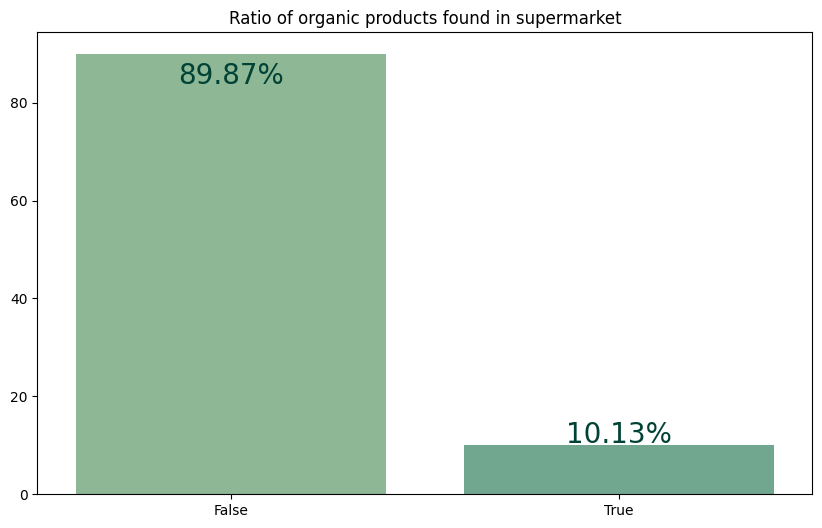

In [31]:
# Ratio of organic products found in supermarket
total_products_count = products.shape[0]
organic_ratio = products['is_organic'].value_counts()/total_products_count*100
ax = sns.barplot(x= organic_ratio.index, y=organic_ratio.values, palette=colors)
annotate_text(ax)
plt.title('Ratio of organic products found in supermarket')
plt.show()

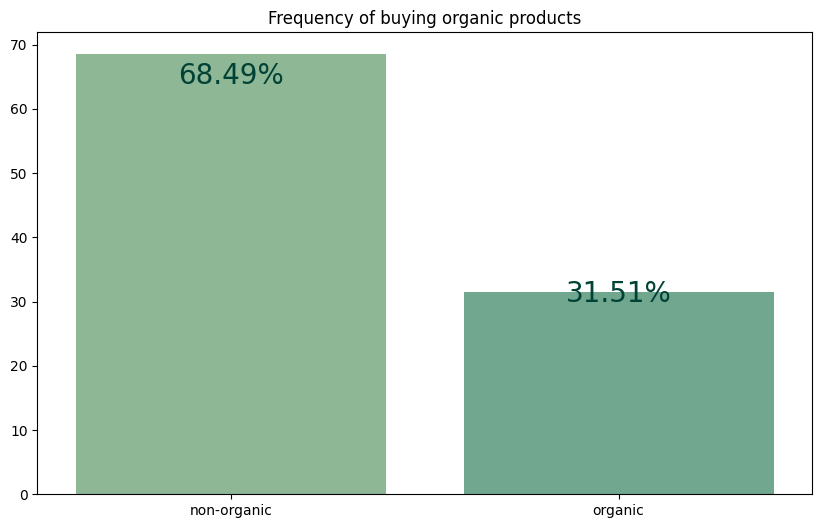

In [32]:
# Frequency of buying organic products
total_order_products_count = order_products.shape[0]
organic_freq = order_products['is_organic'].value_counts()/total_order_products_count*100
ax = sns.barplot(x= organic_freq.index, y=organic_freq.values, palette=colors)
ax.set_xticklabels(['non-organic', 'organic'])
annotate_text(ax)
plt.title('Frequency of buying organic products')
plt.show()

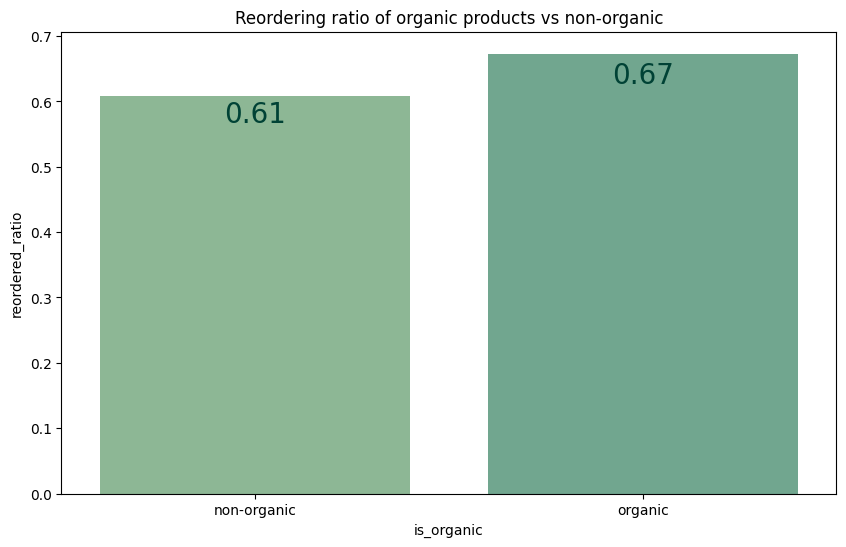

In [33]:
# Reordering ratio of organic products vs non-organic
non_first_orders_mask = order_products['order_number'] != 1
groupeddf = order_products[non_first_orders_mask].groupby(['is_organic']).agg({'reordered':'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
ax = sns.barplot(x='is_organic', y='reordered_ratio', data=groupeddf, palette=colors)
annotate_text(ax, append_to_text='')
ax.set_xticklabels(['non-organic', 'organic'])
plt.title('Reordering ratio of organic products vs non-organic')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5132\2134729197.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'organic_products_count')


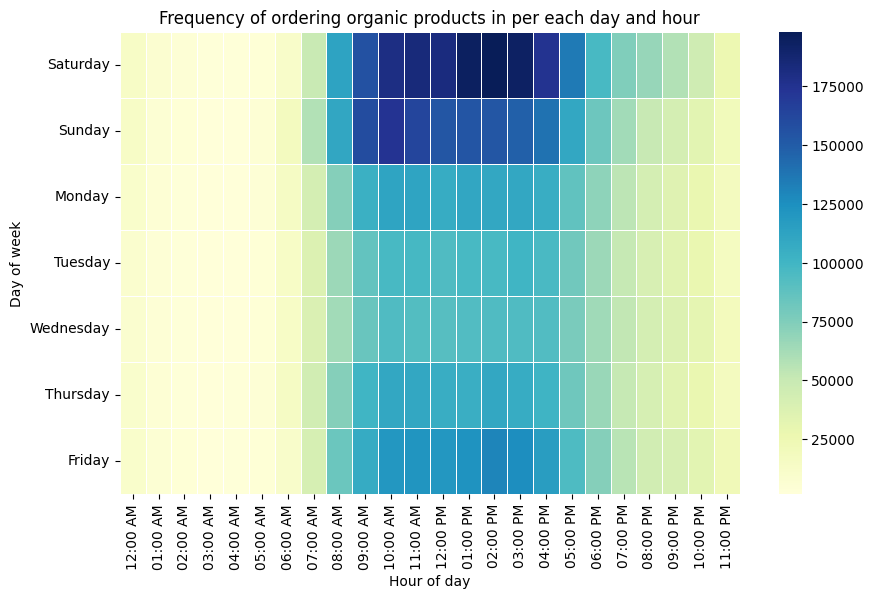

In [34]:
# Heatmap of the count of ordering organic products in each day with each hour
groupeddf = order_products.groupby(['order_dow', 'order_hour_of_day'])['is_organic'].agg('sum').reset_index().rename(columns={'is_organic':'organic_products_count'})
heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'organic_products_count')

ax = sns.heatmap(data=heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title('Frequency of ordering organic products in per each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

### **Insights:**
- Heatmap of buying an organic product is very similar to heatmap of buying any products.
- This indicates that buying an organic product is not tied to specific time, but the time orders are mostly purchased at.

### **Insights on Department and Aisles:**
### Analyzing Department and Aisles
- Departments cotaining large count of products
    - Personal care
    - Pantry
    - Snacks
- 5 Most departments ordered from
    - 29% of ordered products from department: produce
    - dairy eggs
    - snacks
    - beverages
    - frozen
- 5 Most aisles ordered from
    - 14% of ordered products from aisle: fresh fruit
    - fresh vegetables
    - packaged vegetables fruits
    - yogurt
    - packaged cheese
- 3 Most reordered from departments
- dairy eggs: by 71% products from this department will be reordered
- beverages: by 69.5% products from this department will be reordered
- produce: : by 69.13% products from this department will be reordered

## Purchasing behaviour on Departments and Aisles
#### Count of products in each department

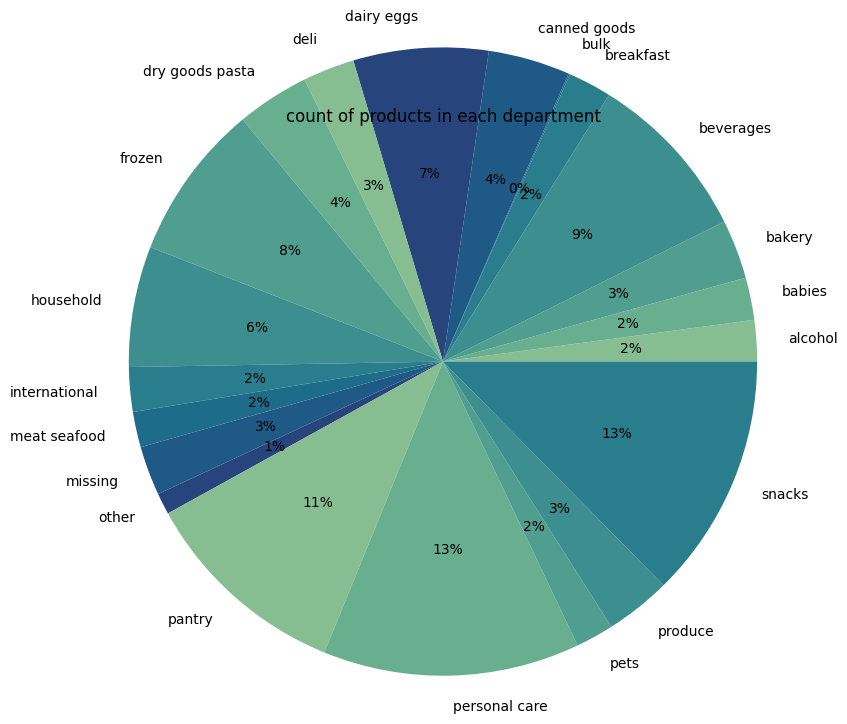

In [35]:
# count of products in each department

# merge products with departments
prod_dept = products.merge(departments, on='department_id', how='left')
data = prod_dept.groupby(['department']).agg({'product_id':'count'}).reset_index().rename(columns={'product_id':'products_count'})
plt.pie(data['products_count'], labels = data['department'], colors = colors, autopct='%.0f%%', radius=1.7)
plt.title('count of products in each department')
plt.show()

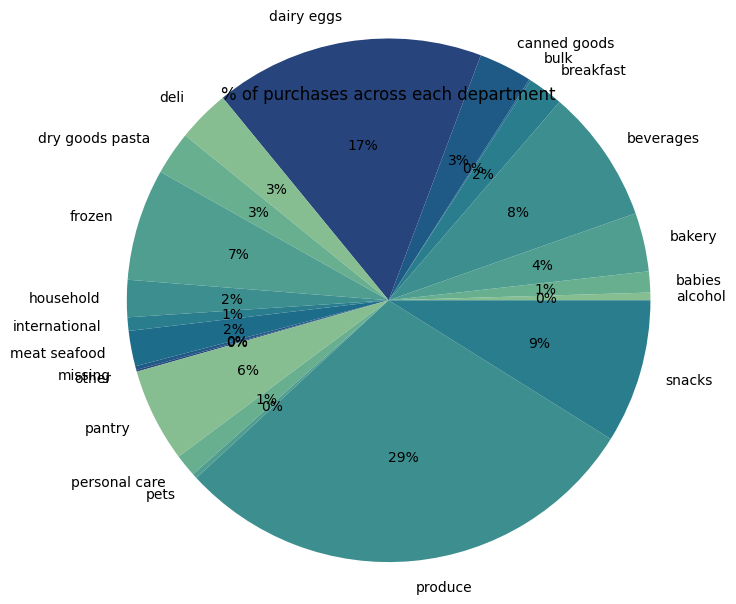

In [36]:
# From All ordered products, the count of contribution of each department
# Group by the count of ordering from a department
total_ordered_products = order_products.shape[0]
groupeddf = order_products.groupby(['department'], as_index=False).count().rename(columns={'department_id':'count_of_ordered_prods'})

fig = plt.figure(figsize = (20, 5))
plt.pie(groupeddf['count_of_ordered_prods'], labels = groupeddf['department'], colors = colors, autopct='%.0f%%', radius=1.7)
plt.title('% of purchases across each department')
plt.show()

<Figure size 2000x500 with 0 Axes>

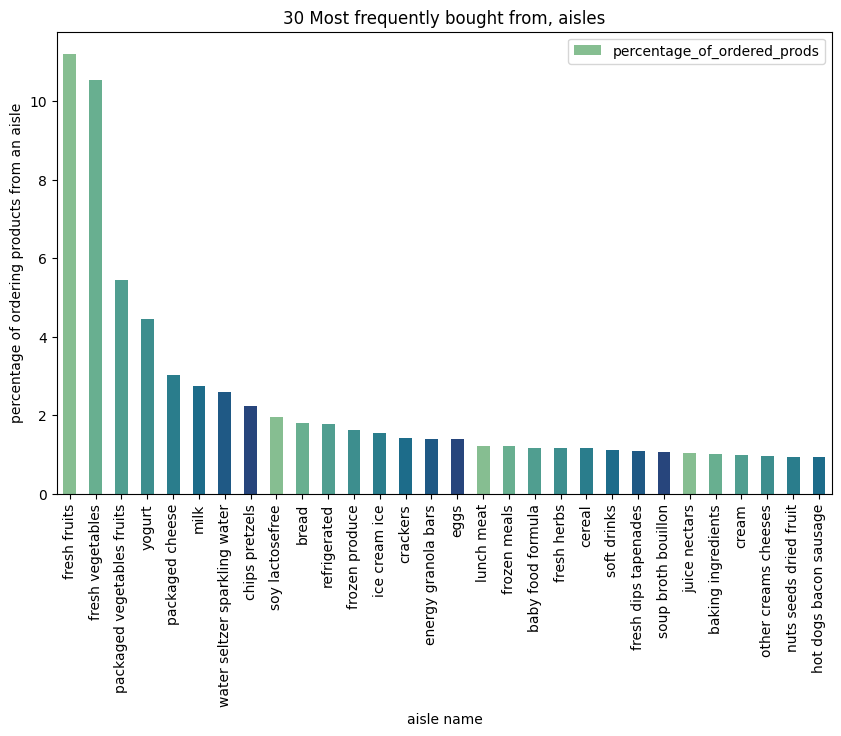

In [37]:
# From All ordered products, the count of contribution of each aisle
# Group by the count of ordering from an aisle
total_ordered_products = order_products.shape[0]
groupeddf = order_products.groupby(['aisle'], as_index=False).agg({'aisle_id':'count'}).rename(columns={'aisle_id':'count_of_ordered_prods'})
groupeddf['percentage_of_ordered_prods'] = groupeddf['count_of_ordered_prods']/total_ordered_products*100
groupeddf = groupeddf.sort_values(by=['count_of_ordered_prods'], ascending=False)
fig = plt.figure(figsize = (20, 5))
groupeddf.iloc[:30].plot.bar(x='aisle', y='percentage_of_ordered_prods', color=colors)
plt.ylabel('percentage of ordering products from an aisle')
plt.xlabel('aisle name')
plt.xticks(rotation=90)
plt.title('30 Most frequently bought from, aisles')
plt.show()

### Reorder ratio for various departments

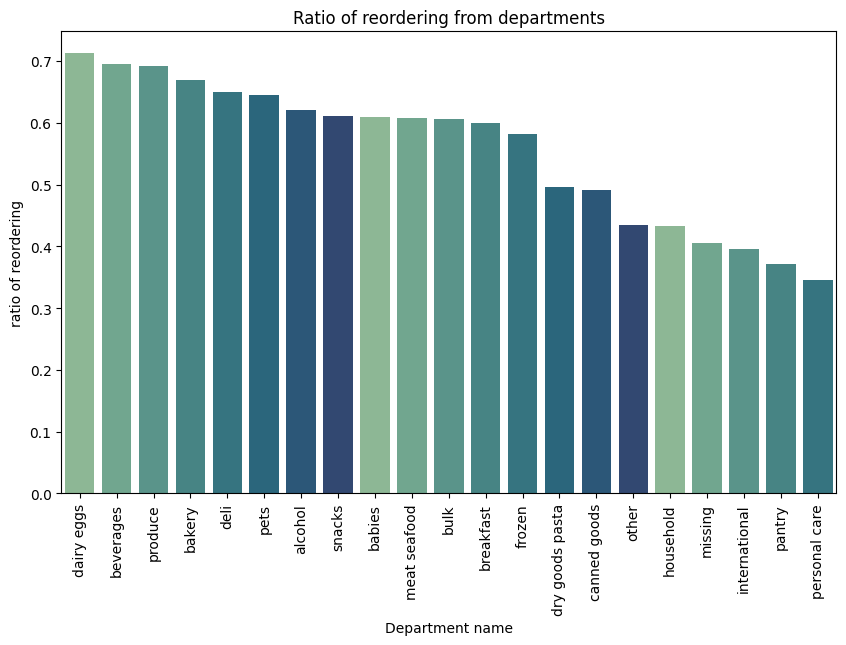

,department,reordered_ratio
7,dairy eggs,0.712287
3,beverages,0.695207
19,produce,0.691380
2,bakery,0.669671
8,deli,0.649702


In [38]:
# Heatmap on the propability of non-new users to reorder for each day each hour
non_first_orders = order_products['order_number'] != 1
groupeddf = order_products[non_first_orders].groupby(['department']).agg({'reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio'})

groupeddf = groupeddf.sort_values(by=['reordered_ratio'], ascending=False)
sns.barplot(x='department', y='reordered_ratio', data=groupeddf, palette=colors)

plt.title('Ratio of reordering from departments')
plt.ylabel('ratio of reordering')
plt.xticks(rotation=90)
plt.xlabel('Department name')
plt.show()

groupeddf.head()

#### Analyze ordering frequency of specific department across dayhours and weekdays

C:\Users\HP\AppData\Local\Temp\ipykernel_5132\1786589979.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'order_prods_count')


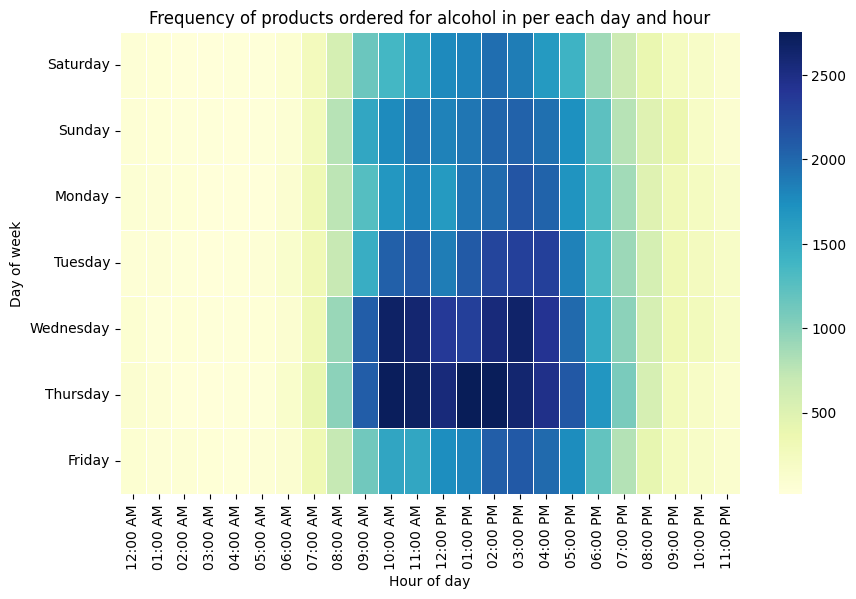

In [39]:
# Take department name as input 
# dep_name = input('Enter the department name you want to generate heatmap for:')
dep_name='alcohol'
exists = dep_name in departments['department'].unique()

if (exists):
    # Heatmap of the count of orders in each day with each hour
    dep_order_products = order_products[order_products['department']==dep_name]
    groupeddf = dep_order_products.groupby(['order_dow', 'order_hour_of_day']).agg('count').reset_index().rename(columns={'order_id':'order_prods_count'})
    heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'order_prods_count')

    ax = sns.heatmap(data=heatmap_data, cmap="YlGnBu", linewidths=.5)
    plt.title('Frequency of products ordered for '+dep_name+' in per each day and hour')
    plt.ylabel('Day of week')
    plt.xlabel('Hour of day')
    plt.show()